# Communicate Data Findings Project - Ford Go Bikes

## Table of Contents
<ul>
<li><a href="#1">Introduction</a></li>
<li><a href="#2">Preliminary Wrangling</a></li>
<li><a href="#3">Univariate Exploration</a></li>
<li><a href="#4">Bivariate Exploration</a></li>
<li><a href="#5">Multivariate Exploration</a></li>
</ul>

<a id='1'></a>
## Introduction:
    In this project I will be investigating Ford's Go Bikes. After assessing and cleaning the dataset, I will explore the data and find insights. I will also visualize the data to get a better understanding of my insights. I will be using univariate, bivariate and multivairate explorations and visualizations. 

<a id='2'></a>
## Preliminary Wrangling:

### Data Gathering:

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
df = pd.read_csv('201902-fordgobike-tripdata.csv')
df.head(1)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No


### Data Assessment:

In [6]:
df.shape

(183412, 16)

In [7]:
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [8]:
df.tail()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
183407,480,2019-02-01 00:04:49.7240,2019-02-01 00:12:50.0340,27.0,Beale St at Harrison St,37.788059,-122.391865,324.0,Union Square (Powell St at Post St),37.788300,-122.408531,4832,Subscriber,1996.0,Male,No
183408,313,2019-02-01 00:05:34.7440,2019-02-01 00:10:48.5020,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,66.0,3rd St at Townsend St,37.778742,-122.392741,4960,Subscriber,1984.0,Male,No
183409,141,2019-02-01 00:06:05.5490,2019-02-01 00:08:27.2200,278.0,The Alameda at Bush St,37.331932,-121.904888,277.0,Morrison Ave at Julian St,37.333658,-121.908586,3824,Subscriber,1990.0,Male,Yes
183410,139,2019-02-01 00:05:34.3600,2019-02-01 00:07:54.2870,220.0,San Pablo Ave at MLK Jr Way,37.811351,-122.273422,216.0,San Pablo Ave at 27th St,37.817827,-122.275698,5095,Subscriber,1988.0,Male,No
183411,271,2019-02-01 00:00:20.6360,2019-02-01 00:04:52.0580,24.0,Spear St at Folsom St,37.789677,-122.390428,37.0,2nd St at Folsom St,37.785000,-122.395936,1057,Subscriber,1989.0,Male,No


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

> Note: start_time and end_time should be in datetime format. start_station_id, end_station_id and bike_id should be in string format. member_birth_year should be integer. user_type and member_gender should be in category format.

In [10]:
sum(df.duplicated())

0

> Note: There are no duplicated values.

In [11]:
df.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

> Note: There are missing values in the start and end stations, as well as birth year and gender.

In [12]:
df[df['member_birth_year'].isnull()]

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
13,915,2019-02-28 23:49:06.0620,2019-03-01 00:04:21.8670,252.0,Channing Way at Shattuck Ave,37.865847,-122.267443,244.0,Shattuck Ave at Hearst Ave,37.873676,-122.268487,5101,Subscriber,NaN,NaN,No
28,650,2019-02-28 23:43:27.5030,2019-02-28 23:54:18.4510,258.0,University Ave at Oxford St,37.872355,-122.266447,263.0,Channing Way at San Pablo Ave,37.862827,-122.290230,4784,Customer,NaN,NaN,No
53,3418,2019-02-28 22:41:16.3620,2019-02-28 23:38:14.3630,11.0,Davis St at Jackson St,37.797280,-122.398436,11.0,Davis St at Jackson St,37.797280,-122.398436,319,Customer,NaN,NaN,No
65,926,2019-02-28 23:17:05.8530,2019-02-28 23:32:32.6820,13.0,Commercial St at Montgomery St,37.794231,-122.402923,81.0,Berry St at 4th St,37.775880,-122.393170,2951,Subscriber,NaN,NaN,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183354,449,2019-02-01 01:35:07.6630,2019-02-01 01:42:36.8780,244.0,Shattuck Ave at Hearst Ave,37.873676,-122.268487,253.0,Haste St at College Ave,37.866418,-122.253799,5430,Customer,NaN,NaN,No
183356,795,2019-02-01 01:25:50.3660,2019-02-01 01:39:05.9500,368.0,Myrtle St at Polk St,37.785434,-122.419622,125.0,20th St at Bryant St,37.759200,-122.409851,5400,Subscriber,NaN,NaN,No
183363,673,2019-02-01 01:12:24.4200,2019-02-01 01:23:37.6450,75.0,Market St at Franklin St,37.773793,-122.421239,133.0,Valencia St at 22nd St,37.755213,-122.420975,5166,Customer,NaN,NaN,No
183371,196,2019-02-01 01:08:38.6410,2019-02-01 01:11:54.9490,58.0,Market St at 10th St,37.776619,-122.417385,75.0,Market St at Franklin St,37.773793,-122.421239,2395,Customer,NaN,NaN,No


> Note: All of the instances where member_birth_year is null, gender is null as well.

In [13]:
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


#### Data Assessment Conclusions:
    - Null values need to be dropped in age column
    - Incorrect data types need to be fixed:
        - start_time and end_time need to be converted from object to datetime format
        - start_station_id, end_station_id and bike_id need to be converted from integer to object
        - user_type and member_gender need to be converted from object to category
        - member_birth_year needs to be converted from float to integer
    - Columns need to be changed for better analysis:
        - member_birth_year needs to be changed to member_age
        - duration_sec needs to be changed to duration_min
    - Columns that are not needed for data analysis need to be dropped
    

### Data Cleaning:

In [14]:
df_clean = df.copy()

`1` **Dropping Null Values:**

In [15]:
#Dropping the null values in member_birth_year and member_gender:
df_clean.drop(df_clean[df_clean['member_birth_year'].isnull()].index, inplace = True)
df_clean.isnull().sum()

duration_sec                 0
start_time                   0
end_time                     0
start_station_id           195
start_station_name         195
start_station_latitude       0
start_station_longitude      0
end_station_id             195
end_station_name           195
end_station_latitude         0
end_station_longitude        0
bike_id                      0
user_type                    0
member_birth_year            0
member_gender                0
bike_share_for_all_trip      0
dtype: int64

In [16]:
df_clean.shape

(175147, 16)

`2` **Correcting Data Types:**

In [17]:
df_clean.dtypes

duration_sec                 int64
start_time                  object
end_time                    object
start_station_id           float64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
user_type                   object
member_birth_year          float64
member_gender               object
bike_share_for_all_trip     object
dtype: object

In [18]:
#Changing start_time and end_time to datetime format:
df_clean['start_time'] = pd.to_datetime(df_clean['start_time'])
df_clean['end_time'] = pd.to_datetime(df_clean['end_time'])

In [19]:
#Changing id columns to string format:
df_clean['start_station_id'] = df_clean['start_station_id'].astype(str)
df_clean['end_station_id'] = df_clean['end_station_id'].astype(str)
df_clean['bike_id'] = df_clean['bike_id'].astype(str)

In [20]:
#Changing member_type and member_gender to category:
df_clean['user_type'] = df_clean['user_type'].astype('category')
df_clean['member_gender'] = df_clean['member_gender'].astype('category')

In [21]:
#Confirming:
df_clean.dtypes

duration_sec                        int64
start_time                 datetime64[ns]
end_time                   datetime64[ns]
start_station_id                   object
start_station_name                 object
start_station_latitude            float64
start_station_longitude           float64
end_station_id                     object
end_station_name                   object
end_station_latitude              float64
end_station_longitude             float64
bike_id                            object
user_type                        category
member_birth_year                 float64
member_gender                    category
bike_share_for_all_trip            object
dtype: object

`3` **Changing Columns:**

In [22]:
#Adding column for member age:
df_clean['member_age'] = 2021 - df_clean['member_birth_year']
df_clean['member_age'] = df_clean['member_age'].astype(int)

In [23]:
#Adding column for duration in minutes:
df_clean['duration_min'] = df_clean['duration_sec']/60
df_clean['duration_min'] = df_clean['duration_min'].astype(int)

In [24]:
#Calculating distance traveled between coordinates:
def dist_from_coordinates(start_station_latitude, start_station_longitude, end_station_latitude, end_station_longitude):
  R = 6371  # Earth radius in km

  #Converting to radians:
  d_lat = np.radians(end_station_latitude-start_station_latitude)
  d_lon = np.radians(end_station_longitude-start_station_longitude)

  r_lat1 = np.radians(start_station_latitude)
  r_lat2 = np.radians(end_station_latitude)

  #Using the haversine formula:
  a = np.sin(d_lat/2.) **2 + np.cos(r_lat1) * np.cos(r_lat2) * np.sin(d_lon/2.)**2

  haversine = 2 * R * np.arcsin(np.sqrt(a))

  return haversine

#Creating new column for distance traveled:
new_column = []                    
for index,row in df_clean.iterrows():
  start_station_latitude = row['start_station_latitude']
  start_station_longitude = row['start_station_longitude']
  end_station_latitude = row['end_station_latitude']
  end_station_longitude = row['end_station_longitude']
  value = dist_from_coordinates(start_station_latitude, start_station_longitude, end_station_latitude, end_station_longitude)  #get the distance
  new_column.append(value)   #Appending the empty list with distance values

df_clean.insert(11,"distance_traveled",new_column)

#References: 1

In [25]:
#Changing distance_traveled from kilometers to miles:
df_clean['distance_traveled'] = df_clean['distance_traveled'] * 0.621371

In [26]:
#Confirming:
df_clean.head(1)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,distance_traveled,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,member_age,duration_min
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,0.338466,4902,Customer,1984.0,Male,No,37,869


`4`**Dropping Columns:**

In [27]:
#Dropping columns that are not needed for analysis:
df_clean.drop(columns =['start_station_latitude', 'start_station_longitude',
                                  'end_station_latitude','end_station_longitude','member_birth_year',
                                  'bike_share_for_all_trip', 'duration_sec'], inplace=True)
#Confirming:
df_clean.head(1)

,start_time,end_time,start_station_id,start_station_name,end_station_id,end_station_name,distance_traveled,bike_id,user_type,member_gender,member_age,duration_min
0,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),13.0,Commercial St at Montgomery St,0.338466,4902,Customer,Male,37,869


### Data Storing:

In [28]:
df_clean.to_csv('fordgobike_clean.csv', index = False)

### Wrangling Conclusions:
#### What is the structure of your dataset?
    In my dataset, there are 175,417 rows relaying the travels of Ford's go bikes in California.My column structure is as follows:
    - start time and end time
    - start and end station's ids and names
    - distance traveled in miles
    - bike id
    - user type
    - member gender and age
    - duration in minutes

#### What is/are the main feature(s) of interest in your dataset?

    The main features of interest in my dataset is the distance traveled, member age and duration. All of these I calculated using columns from the original dataset which I have thus since removed.

#### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

    In my investigation, I would like to find the relationship of distance and time of a bike ride and to find this, my main features of distance traveled and trip duration will help with that. I also have demographics to analyze such as the member's age and gender.

<a id='3'></a>
## Univariate Exploration

In [29]:
df_clean.head()

,start_time,end_time,start_station_id,start_station_name,end_station_id,end_station_name,distance_traveled,bike_id,user_type,member_gender,member_age,duration_min
0,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),13.0,Commercial St at Montgomery St,0.338466,4902,Customer,Male,37,869
2,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,3.0,Powell St BART Station (Market St at 4th St),1.680526,5905,Customer,Male,49,1030
3,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,70.0,Central Ave at Fell St,0.162015,6638,Subscriber,Other,32,608
4,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,222.0,10th Ave at E 15th St,1.497070,4898,Subscriber,Male,47,26
5,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93.0,4th St at Mission Bay Blvd S,323.0,Broadway at Kearny,2.070534,5200,Subscriber,Male,62,29


`1`**Average Age of Bike Riders:**

In [30]:
#Finding the average age:
df_clean['member_age'].mean()

36.19356312126385

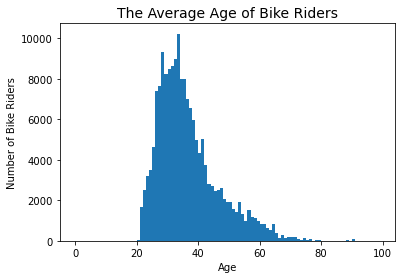

In [31]:
#Plotting:
bin_edges = np.arange(0, 100)
plt.hist(df_clean['member_age'], bins = bin_edges)
plt.title("The Average Age of Bike Riders", {'fontsize' : 14})
plt.xlabel("Age")
plt.ylabel("Number of Bike Riders");

> The average age of bike riders is 36 years old. The histogram is right skewed with the majority of riders being between the ages of 25 and 40 years old. The data then falls off as the riders get older in age. 

`2` **Average Bike Rides by Weekday**

In [32]:
#Finding the average rides by day of the week:
ride_days = df_clean['start_time'].dt.dayofweek.value_counts()
ride_days.sort_index(inplace=True)
ride_days

0    25686
1    30616
2    28456
3    33733
4    27682
5    14442
6    14532
Name: start_time, dtype: int64

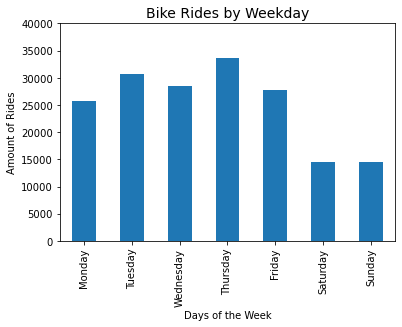

In [33]:
# Plotting the findings 
ride_days.plot.bar()
plt.ylim(top=40000)
plt.title("Bike Rides by Weekday", {'fontsize' : 14})
plt.xlabel("Days of the Week")
plt.ylabel("Amount of Rides")
plt.xticks(np.arange(7),('Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'),rotation=90);   

> The weekday with the most bike rides is Thurday. Thursday has an average of 33,733 rides. There are around 15,000 more rides on the weekdays than the weekends. Between Saturday and Sunday, the weekend averages 14,487 rides, while the weekdays average 29,235 rides. One possible explanation for this could be that the bikes are used for work commute more than casual riding. 

`3`**Average Distance Traveled**

In [34]:
#Finding the average distance traveled:
df_clean['distance_traveled'].describe(percentiles = [.99])

count    175147.000000
mean          1.049700
std           0.681606
min           0.000000
50%           0.887669
99%           3.150435
max          43.166172
Name: distance_traveled, dtype: float64

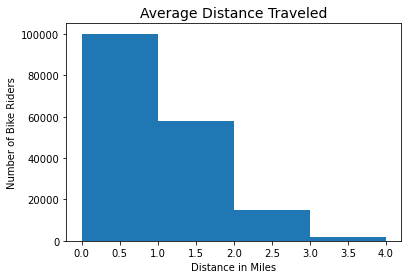

In [35]:
#Plotting:
bin_edges = np.arange(0, 5)
plt.hist(df_clean['distance_traveled'], bins = bin_edges)
plt.title("Average Distance Traveled", {'fontsize' : 14})
plt.xlabel("Distance in Miles")
plt.ylabel("Number of Bike Riders");

>The average distance traveled is 1 mile. The max distance is 43 miles, but since 99% of the data is under 5 miles, I decided only to graph up to 5 miles. Most bike rides are under a mile and the closer the distance reaches 4 miles, the less bike rides there are. There is a heavy right skewed nature to these data points. This coincides with my previous finding that the bikes are probably used for work commute more than anything which would explain the short distances traveled. 

`4`**Average Ride Duration**

In [36]:
#Finding the average travel duration:
df_clean['duration_min'].describe(percentiles = [.99])

count    175147.000000
mean         11.244971
std          27.361348
min           1.000000
50%           8.000000
99%          52.000000
max        1409.000000
Name: duration_min, dtype: float64

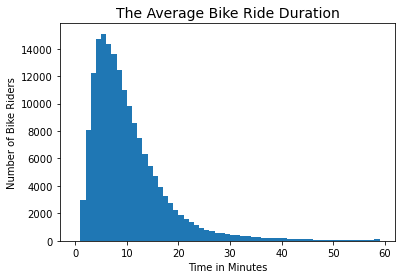

In [37]:
#Plotting the findings:
bin_edges = np.arange(0, 60)
plt.hist(df_clean['duration_min'], bins = bin_edges)
plt.title("The Average Bike Ride Duration", {'fontsize' : 14})
plt.xlabel("Time in Minutes")
plt.ylabel("Number of Bike Riders");

> Using the same method as before and only plotting around 99% of the data points, I find that the average bike ride duration is 11 minutes. This visual is right skewed with the majority of bike rides being between 5 and 15 minutes long. There is a heavy drop in bike rides after the 20 minute mark, thus relaying that only a little amount of people are using the bikes for long periods of time. As to prior findings, if the bikes are used for daily commute to work, it makes sense that they are only used for 10 minutes as longer durations for work commute would not be feasible on a bike.

### Univariate Exploration Conclusions:
#### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

    There were a few unusual points in my findings. First being a travel distance of 43 miles and second, a duration of 1409 minutes which is almost a full day of riding. These are outliers that I did not include in my graphs. I also found it unnatural that teenagers were not included in the dataset.

#### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

    All of the distributions appeared as aspected besides a few outliers. For this specific exploration, I did not perform any operations to change the form besides excluding outliers that would make the visual hard to understand. 

<a id='4'></a>
## Bivariate Exploration

In [38]:
df_clean.head(1)

,start_time,end_time,start_station_id,start_station_name,end_station_id,end_station_name,distance_traveled,bike_id,user_type,member_gender,member_age,duration_min
0,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),13.0,Commercial St at Montgomery St,0.338466,4902,Customer,Male,37,869


`1` **Bike Rides of User Type by Weekday**

In [39]:
#Finding the number of bike rides per day by subscriber:
S_ride_days = df_clean.query('user_type == "Subscriber"').start_time.dt.dayofweek.value_counts()
S_ride_days.sort_index(inplace=True)

#Finding the number of bike rides per day by customer:
C_ride_days = df_clean.query('user_type == "Customer"').start_time.dt.dayofweek.value_counts()
C_ride_days.sort_index(inplace=True)

#Confirming:
print(S_ride_days)
print(C_ride_days)

0    23362
1    28333
2    26339
3    30858
4    25137
5    12259
6    12228
Name: start_time, dtype: int64
0    2324
1    2283
2    2117
3    2875
4    2545
5    2183
6    2304
Name: start_time, dtype: int64


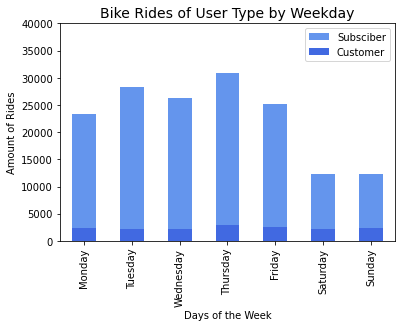

In [41]:
#Plotting the findings:
S_ride_days.plot.bar(color='cornflowerblue')
C_ride_days.plot.bar(color='royalblue')
plt.ylim(top=40000)
plt.title("Bike Rides of User Type by Weekday", {'fontsize' : 14})
plt.xlabel("Days of the Week")
plt.ylabel("Amount of Rides")
plt.xticks(np.arange(7),('Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'),rotation=90)
plt.legend(["Subscriber","Customer"]);   

> This graph shows the relationship between subscriber and customer usage of bikes by weekday. While there is a trend with the week usage of bikes by subscibers, the trend of usage for customers is quite uniform. For subscibers, the weekend is less busy whereas for customers, the weekend has no effect on the number of bike rides. This could insinuate that customers only use the bikes for fun or random sessions that do not have an effect on what day it is. Since a subscriber will be paying a monthly charge for bike use, it makes sense that they would also use it for their commute to work as it would give them the best money value.

`2` **Gender and Age by Bike Ride Frequency:**

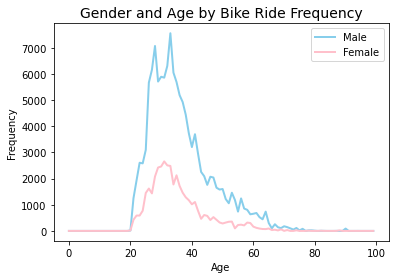

In [246]:
#Creating new dataframe to relate gender and age:
range_df = pd.DataFrame()
range_df['member_age'] = range(100) # age limit of 100
male = range_df.member_age.apply(lambda x:len(df_clean[(df_clean.member_age == x) & (df_clean.member_gender == 'Male')]))
female = range_df.member_age.apply(lambda x:len(df_clean[(df_clean.member_age == x) & (df_clean.member_gender == 'Female')]))

#Plotting the findings:
plt.plot( range_df, male, color='skyblue', linewidth=2)
plt.plot( range_df, female, color='pink', linewidth=2)
plt.legend(["Male","Female"])
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.title("Gender and Age by Bike Ride Frequency", {'fontsize' : 14});

> There is a clear message that this visual represents. One being that males are certainly more likely to use ford go bikes, and another being that the prime age for both genders to go on bike rides is between 20 and 40. However, it seems that the peak age for a female to ride a bike is 30, but males have two peaks, around 25 and 35. While there are significantly more males using the bikes, it would also seem that older males are more likely to ride than older females. 

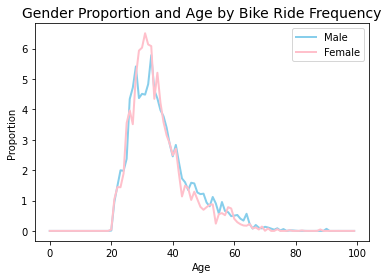

In [249]:
#Correcting proportions:
female_prop = female / sum(female) * 100
male_prop = male / sum(male) * 100

#Plotting:
plt.plot( range_df, male_prop, color='skyblue', linewidth=2)
plt.plot( range_df, female_prop, color='pink', linewidth=2)
plt.legend(['Male','Female'])
plt.xlabel('Age')
plt.ylabel('Proportion')
plt.title('Gender Proportion and Age by Bike Ride Frequency', {'fontsize' : 14});

> Here, it is now more clearly seen that the peak age for females is around age 30 and the peaks for males are both 25 and 35 years. It is also shown that with proportions corrected, a lot more females are riding bikes than males between the two peaks of 25 and 30. Also, older males are still riding more often than older females, but not by a lot. Proportions always give a good insight and different look at the same data. 

`3` **The Relationship Between Distance and Time:**

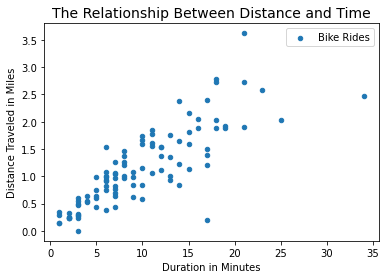

In [262]:
#Plotting the relationship of distance and time by 100 sample:
df_clean[df_clean['duration_min'] < 50].sample(100).plot.scatter(x='duration_min', y='distance_traveled')
plt.title("The Relationship Between Distance and Time", {'fontsize' : 14})
plt.xlabel("Duration in Minutes")
plt.ylabel("Distance Traveled in Miles")
plt.legend(["Bike Rides"]);

> With a sample of 100, the overall relationship between distance and time seems to be positive with medium correlation. There is more correlation towards the beginning and widens out over time and distance. With my sample, there are a few outliers. One ride in particular had a duration of around 17 minutes, but only traveled a quarter of a mile. There could be several explanations with one possibility being heavy traffic or stops. 

### Bivariate Exploration Conclusions:
#### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

    The main features I wanted to explore was distance traveled and duration. The relationship between the two were as expected was positive. Therefore, the longer one travels, the farther they will go. I also explored demographics of gender and age and was quite surprised at the difference that proportion makes. 

#### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

    One thing I found interesting was the relationship that day of the week had with user type. I expected that a user being customer or subscriber would not affect what days they travel on, but it is understandable when looking deeper. A subsciber is more likely to travel on weekdays than weekends, while customers travel on all days quite equally which insinuates that subscibers ride more out of necessity than amusement.

<a id='5'></a>
## Multivariate Exploration

In [265]:
df_clean.head(1)

,start_time,end_time,start_station_id,start_station_name,end_station_id,end_station_name,distance_traveled,bike_id,user_type,member_gender,member_age,duration_min
0,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),13.0,Commercial St at Montgomery St,0.338466,4902,Customer,Male,37,869


`1` **The Relationship of Distance and Time by Age Group:**

In [45]:
#Creating age groups:
df_clean['age_bins'] = df_clean['member_age'].apply(lambda x: '15 - 25' if 15<x<=25
                                                  else '26 - 35' if 25<x<=35
                                                  else '36 - 45' if 35<x<=45
                                                  else '46 - 55' if 45<x<=55
                                                  else '56+' if 55<=x
                                                       else x)
df_clean.age_bins.value_counts()

26 - 35    85013
36 - 45    45656
46 - 55    18285
15 - 25    15569
56+        10624
Name: age_bins, dtype: int64

In [51]:
#Creating a sample:
sample = df_clean.sample(200)

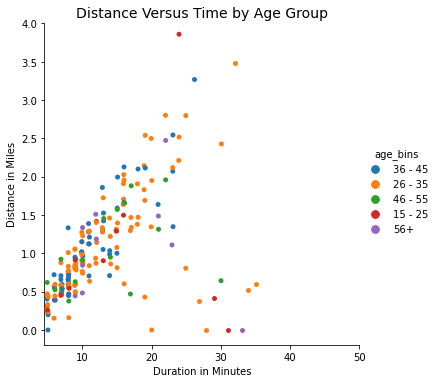

In [52]:
#Plotting a sample of age groups and their relationship to distance and time:
sns.catplot(data = sample, x='duration_min', y='distance_traveled', hue='age_bins');

plt.ylim(top=4)
plt.xlabel('Duration in Minutes')
plt.ylabel('Distance in Miles')
plt.title("Distance Versus Time by Age Group", fontsize = 14)
plt.xticks(np.arange(5,50, step=10),['10','20','30','40','50']);

> The visual above shows the relationship of distance and time by age groups. It is clearly seen that age group 26-35 is the most active with distance and time. There is in overall positve trend with stronger correlation torwards the smaller number and exapnding as the number grow larger. The older age groups of 46-55 and 56+ seem be take shorter rides compared to other age groups. It also looks like the younger age group of 15-25 take longer rides in time but shorter rides in distance than other age groups. All in all, bike rides that are under 1.5 miles and 20 minutes have strong positive correlation.

`2`**The Relationship of Distance and Time by Gender**

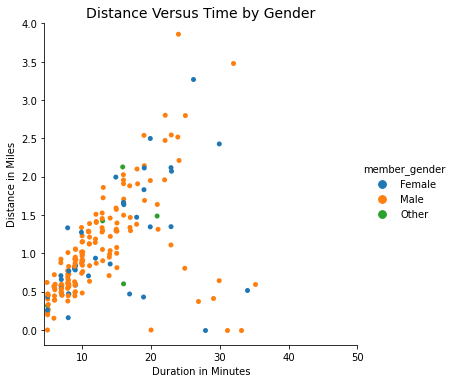

In [53]:
#Plotting a sample of genders and their relationship to distance and time:
sns.catplot(data = sample, x='duration_min', y='distance_traveled', hue='member_gender')

plt.ylim(top=4)
plt.xlabel('Duration in Minutes')
plt.ylabel('Distance in Miles')
plt.title("Distance Versus Time by Gender", fontsize = 14)
plt.xticks(np.arange(5,50, step=10),['10','20','30','40','50']);

> This visual shows a similar trend to the graph with age groups. There is a strong positive relationship towards the beginning, and loses correlation over larger numbers. There are more males riding than females in this sample. The males are also riding for longer times and distances than females. 

`3` **Gender and User Type by Average Distance Traveled:**

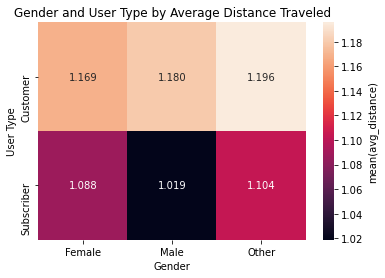

In [376]:
#Plotting a heatmap of gender and user type by average distance:
g = df_clean.groupby(['member_gender', 'user_type']).mean()['distance_traveled']
g = g.reset_index(name = 'avg_distance')
g = g.pivot(index = 'user_type', columns = 'member_gender',
                            values = 'avg_distance')
sns.heatmap(g, annot = True, fmt = '.3f',
           cbar_kws = {'label' : 'mean(avg_distance)'})
plt.title("Gender and User Type by Average Distance Traveled")
plt.xlabel("Gender")
plt.ylabel("User Type");

> The heatmap above shows the relationship of gender and user type by distance traveled. According to this visual, Other travels the farthest regardless of user type. While male customers travel on average farther than females do, when it comes to subscibers, females travel farther.

`4`**Gender and User Type by Average Duration:**

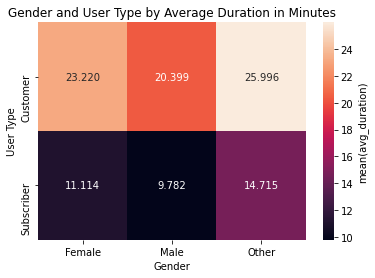

In [379]:
#Plotting gender and user type by average duration:
g2 = df_clean.groupby(['member_gender', 'user_type']).mean()['duration_min']
g2 = g2.reset_index(name = 'avg_duration')
g2 = g2.pivot(index = 'user_type', columns = 'member_gender',
                            values = 'avg_duration')
sns.heatmap(g2, annot = True, fmt = '.3f',
           cbar_kws = {'label' : 'mean(avg_duration)'})
plt.title("Gender and User Type by Average Duration in Minutes")
plt.xlabel("Gender")
plt.ylabel("User Type");

> In this heatmap showing the relationship of gender and user type of average duration, the results are very similar to the relationship with distance. Other still travels the longest in both scenarios of user type like before. However, females travel for longer durations than males do in both circumstances. Also, Customers travel for longer durations than subscribers do on average.

### Multivariate Exploration Conclusions:
#### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

    The first visual I made was for the relationship between distance and time by age group. I found that middle age groups traveled farther and longer than other age groups. Next, was the relationship of gender with distance and time. Here, I found that on average Males travel longer and farther than females. However, in the heatmaps with gender and user type by average distance and time traveled, I found that females mostly traveled farther and longer than males. 

#### Were there any interesting or surprising interactions between features?

    Yes, I found that the difference in the results between the visual representation of average distance and time traveled by genders and user type the relationship of distance and time by genders was quite fascinating. While males traveled longer and farther than females, when looking at average distance traveled and average duration, females actually traveled farther despite user type.

## References:
- `1` https://stackoverflow.com/questions/33029396/using-pandas-to-calculate-distance-between-coordinates-from-imported-csv
- `2` https://www.kaggle.com/residentmario/bivariate-plotting-with-pandas